In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
sns.set_theme()

In [2]:
a=pd.read_csv('HRDatasets.csv')
a.columns=a.columns.str.strip()

In [3]:
print(a)
print(a.head())
print(a.tail())

                Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0         Adinolfi, Wilson  K  10026          0                0         1   
1    Ait Sidi, Karthikeyan     10084          1                1         1   
2           Akinkuolie, Sarah  10196          1                1         0   
3                Alagbe,Trina  10088          1                1         0   
4            Anderson, Carol   10069          0                2         0   
..                        ...    ...        ...              ...       ...   
306            Woodson, Jason  10135          0                0         1   
307        Ybarra, Catherine   10301          0                0         0   
308          Zamora, Jennifer  10010          0                0         0   
309               Zhou, Julia  10043          0                0         0   
310             Zima, Colleen  10271          0                4         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  

In [4]:
print("\nDataframe Info():")
a.info()


Dataframe Info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State           

In [5]:
print("\n Missing values per column:")
print(a.isnull().sum())


 Missing values per column:
Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource  

In [6]:
#salary to  float(coerce avoids crashes if any stray text is present)
a['salary']=pd.to_numeric(a['Salary'],errors='coerce')
a['DateofHire']=pd.to_datetime(a['DateofHire'],format='%d-%m-%Y',errors='coerce')
a['DOB']=pd.to_datetime(a['DOB'],format='%d-%m-%Y',errors='coerce')
a['DateofTermination']=pd.to_datetime(a['DateofTermination'],format='%d-%m-%Y',errors='coerce')
a['LastPerformanceReview_Date']=pd.to_datetime(a['LastPerformanceReview_Date'],format='%d-%m-%Y',errors='coerce')

In [7]:
print("\nDescribe(numeric Columns):")
print(a.select_dtypes(include=[np.number]).describe())


Describe(numeric Columns):
              EmpID   MarriedID  MaritalStatusID    GenderID  EmpStatusID  \
count    311.000000  311.000000       311.000000  311.000000   311.000000   
mean   10156.000000    0.398714         0.810289    0.434084     2.392283   
std       89.922189    0.490423         0.943239    0.496435     1.794383   
min    10001.000000    0.000000         0.000000    0.000000     1.000000   
25%    10078.500000    0.000000         0.000000    0.000000     1.000000   
50%    10156.000000    0.000000         1.000000    0.000000     1.000000   
75%    10233.500000    1.000000         1.000000    1.000000     5.000000   
max    10311.000000    1.000000         4.000000    1.000000     5.000000   

           DeptID  PerfScoreID  FromDiversityJobFairID         Salary  \
count  311.000000   311.000000              311.000000     311.000000   
mean     4.610932     2.977492                0.093248   69020.684887   
std      1.083487     0.587072                0.291248   25

In [8]:
print("\nMarital Data")
print(a['MaritalDesc'].value_counts())
print("\nDepartment Data")
print(a['Department'].value_counts())
print("\nPosition Data")
print(a['Position'].value_counts())
print("\nManager Data")
print(a['ManagerName'].value_counts())


Marital Data
MaritalDesc
Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: count, dtype: int64

Department Data
Department
Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: count, dtype: int64

Position Data
Position
Production Technician I         137
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                      7
Sr. Network Engineer              5
Database Administrator            5
Network Engineer                  5
BI Developer                      4
Senior BI Developer               3
Administrative Assistant          3
Sales Manager                     3
Accountant I                      3
Sr. DBA                           2
IT Manager - DB                   2
Sr. A

In [9]:
total_employees=len(a)
print(f'\nTotal Employees:{total_employees}')


Total Employees:311


In [10]:
a['DateofTermination']=a['DateofTermination'].astype('object') #The DateofTermination data type converted to object(string)
a['DateofTermination']=a['DateofTermination'].where(a['DateofTermination'].notna(), #replaced 'not null' values by 'Currently Working'
'Currently Working')
print("\n Date of Termination column values:") #Date of Termination has date and string type both
print(a['DateofTermination'])


 Date of Termination column values:
0        Currently Working
1      2016-06-16 00:00:00
2      2012-09-24 00:00:00
3        Currently Working
4      2016-06-09 00:00:00
              ...         
306      Currently Working
307    2015-09-29 00:00:00
308      Currently Working
309      Currently Working
310      Currently Working
Name: DateofTermination, Length: 311, dtype: object


In [11]:
#counts based on your sentinel logic
employees_left_count=(a['DateofTermination']!='Currently Working').sum()
print(f"\n Number of employees who have left:{employees_left_count}")
currently_working_count=(a['DateofTermination']=='Currently Working').sum()
print(f"\n Number of employees who are currently working:{currently_working_count}")


 Number of employees who have left:104

 Number of employees who are currently working:207


In [12]:
#Distinct Departments
total_departments=a['Department'].nunique()
print(f'Total Departments:{total_departments}')

Total Departments:6


In [13]:
#avg salary
average_salary=a['Salary'].mean()
print(f'Average Salary=Rs {average_salary:.2f}')

Average Salary=Rs 69020.68


In [14]:
now_ts=pd.Timestamp(datetime.now()) #Current/today's date formula(current date stored in now_ts)
a['YearsWithCompany']=(now_ts - a['DateofHire']).dt.days/365.25
average_years_with_company=a['YearsWithCompany'].mean()
print(f'Avg years with company:{average_years_with_company:.2f}')

Avg years with company:12.53


In [15]:
#Age(years) from DOB
a['Age']=(now_ts - a['DOB']).dt.days/365.25 #formula to calculate age (given DOB and current datetime)
average_age=a['Age'].mean()
print(f'Avg age:{average_age:.2f}') #'.2f' is used for getting only two decimal places

Avg age:46.16


In [16]:
#Attrition rate(your formula)
attrition_rate=(employees_left_count/total_employees)*100
print(f'Avg years with company:{attrition_rate:.2f}%')

Avg years with company:33.44%


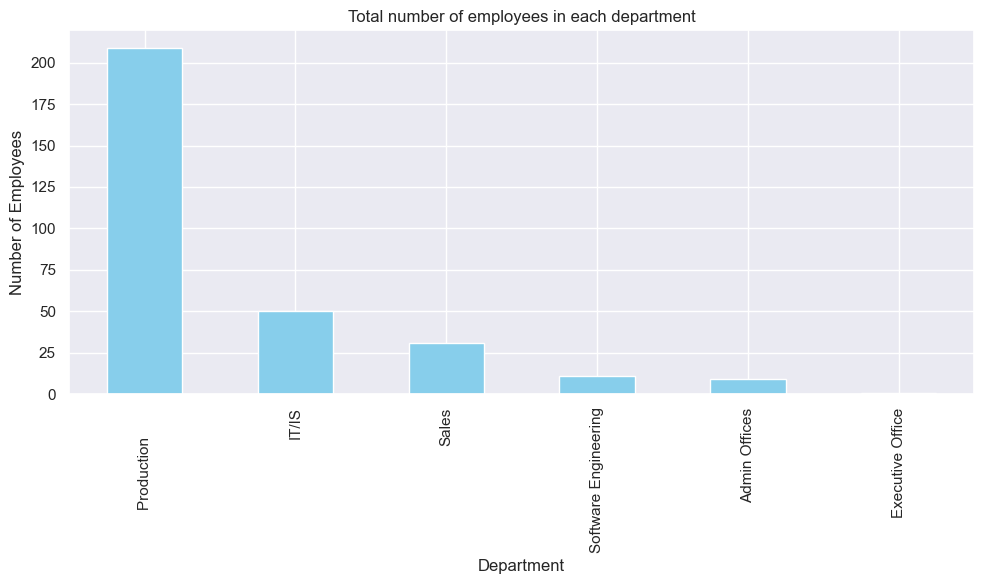

In [17]:
department_counts=a['Department'].value_counts()
plt.figure(figsize=(10,6))
department_counts.plot(kind='bar',color='skyblue')
plt.title("Total number of employees in each department")
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

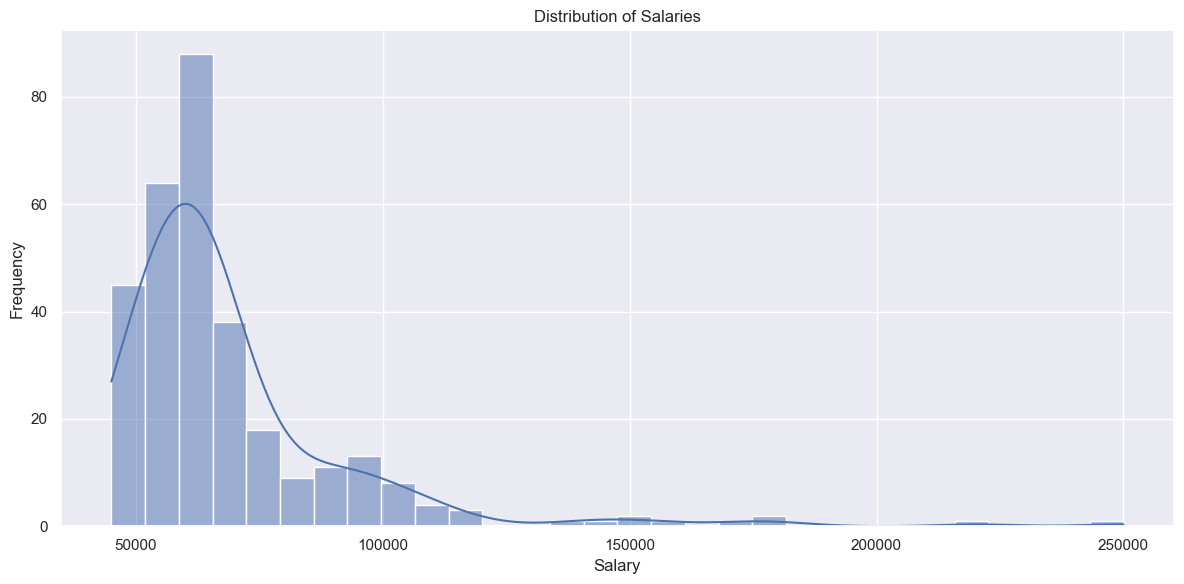

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(a['Salary'],bins=30,kde=True)
plt.title("Distribution of Salaries")
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

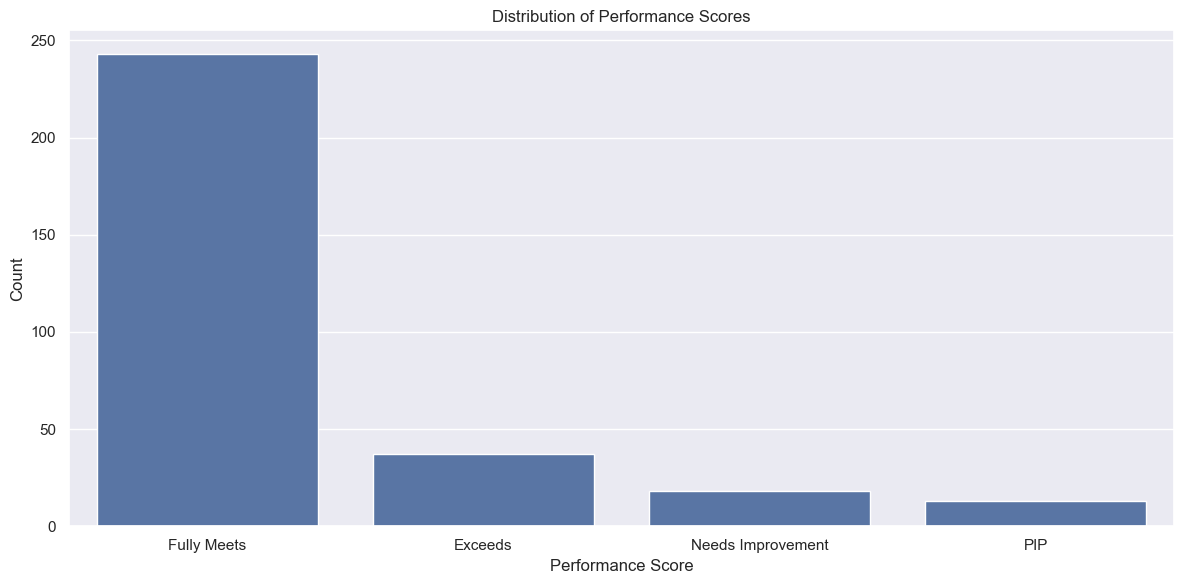

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data=a,x='PerformanceScore',order=a['PerformanceScore'].value_counts().index)
plt.title('Distribution of Performance Scores')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

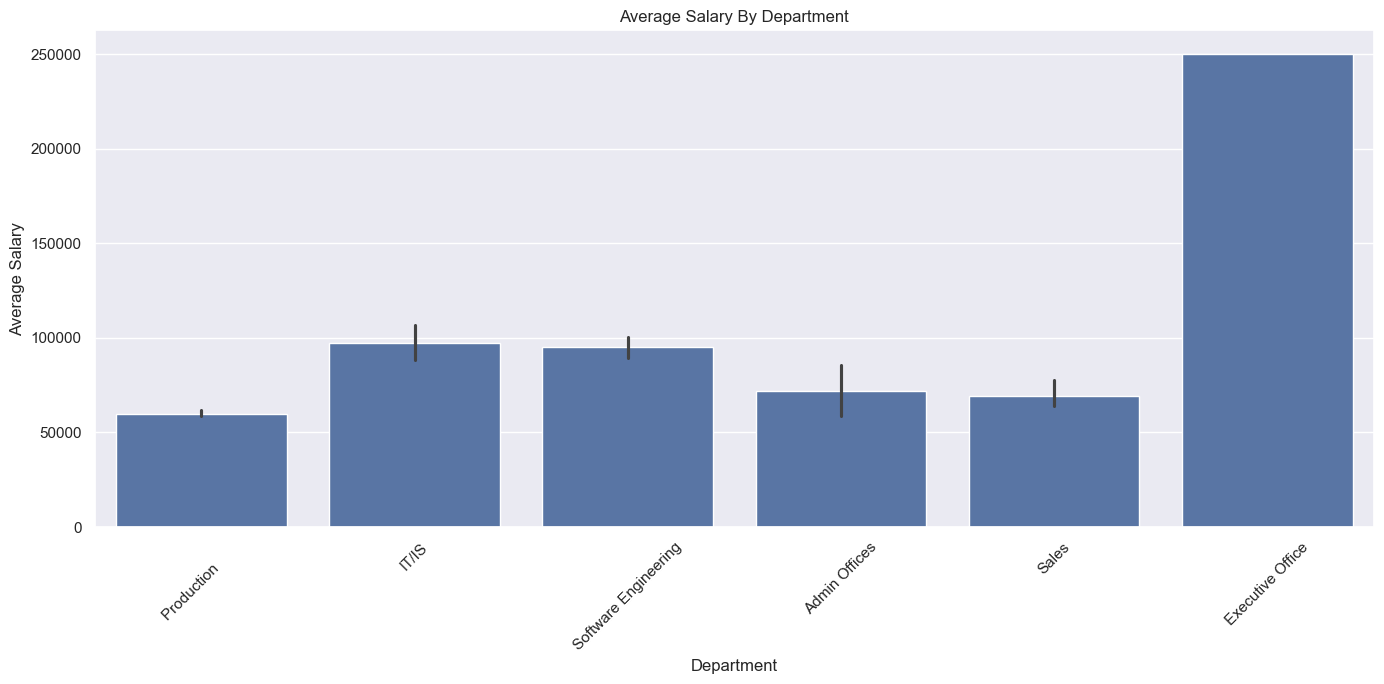

In [20]:
plt.figure(figsize=(14,7))
sns.barplot(data=a,x='Department',y='Salary',estimator=np.mean)
plt.title('Average Salary By Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

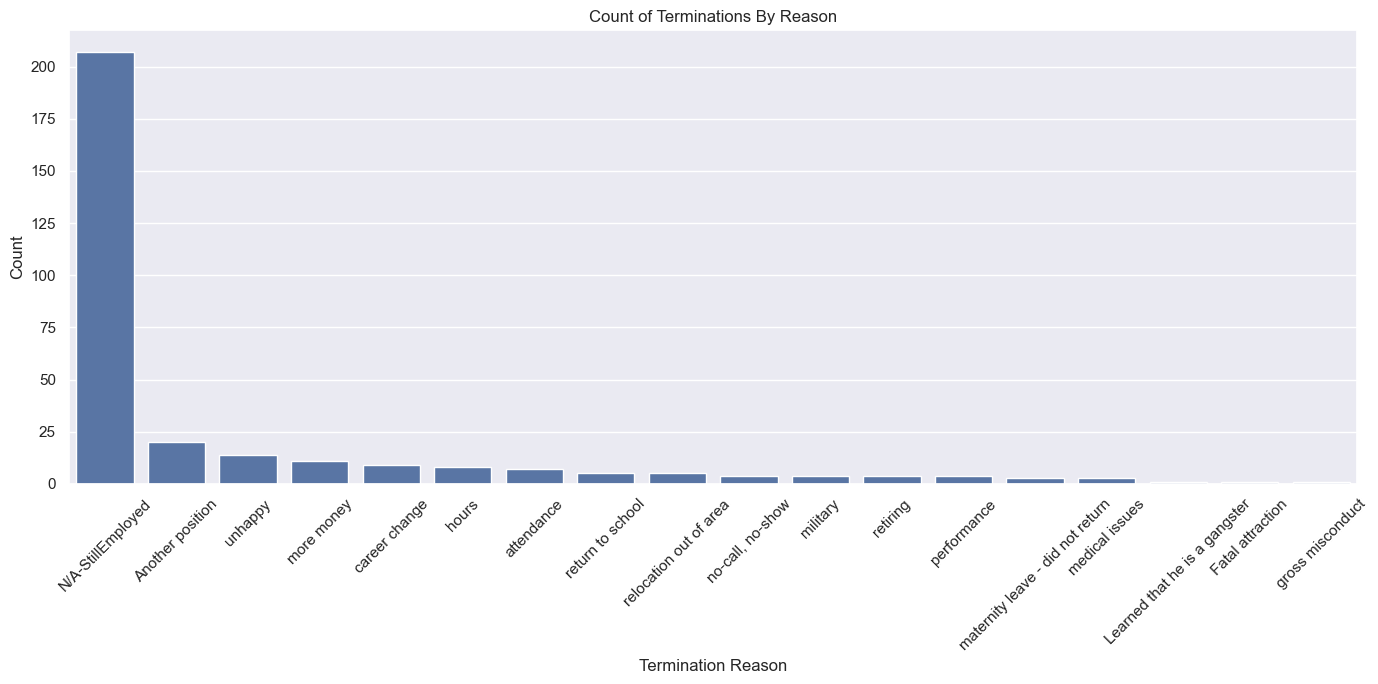

In [21]:
plt.figure(figsize=(14,7))
sns.countplot(data=a,x='TermReason',order=a['TermReason'].value_counts().index)
plt.title('Count of Terminations By Reason')
plt.xlabel('Termination Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

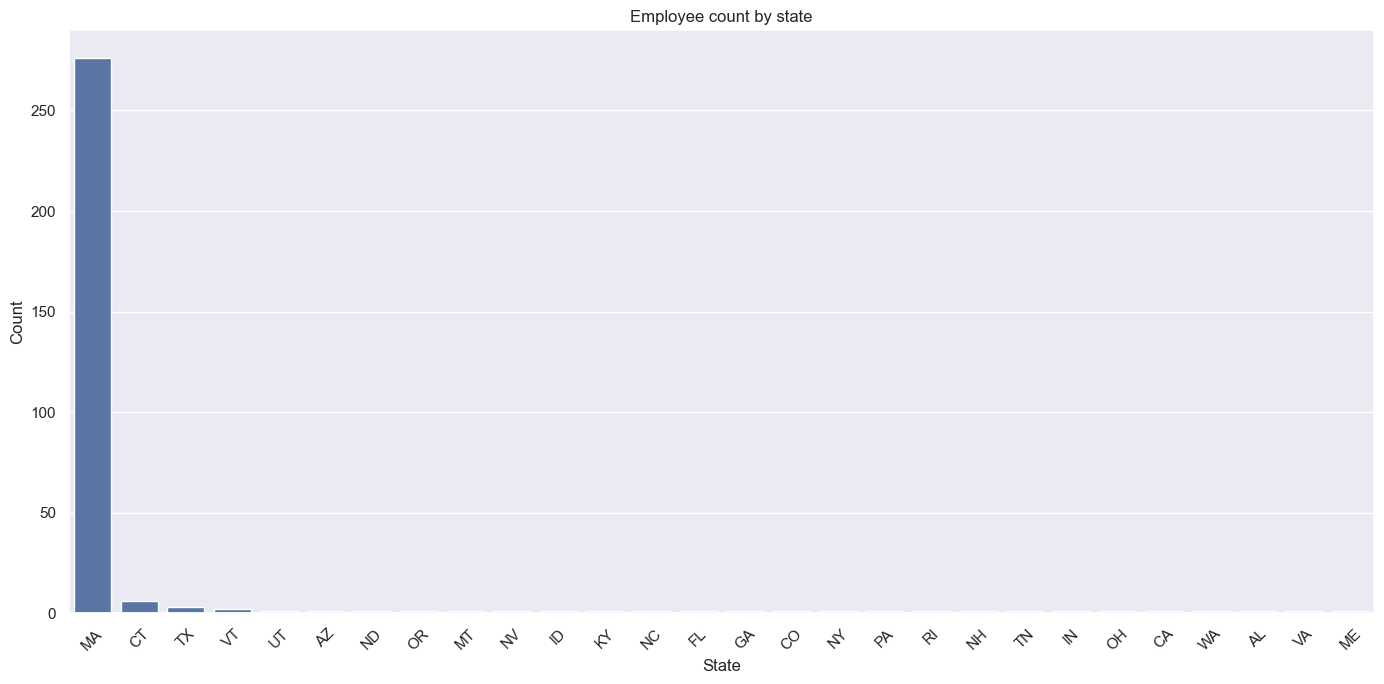

In [22]:
plt.figure(figsize=(14,7))
sns.countplot(data=a,x='State',order=a['State'].value_counts().index)
plt.title('Employee count by state')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

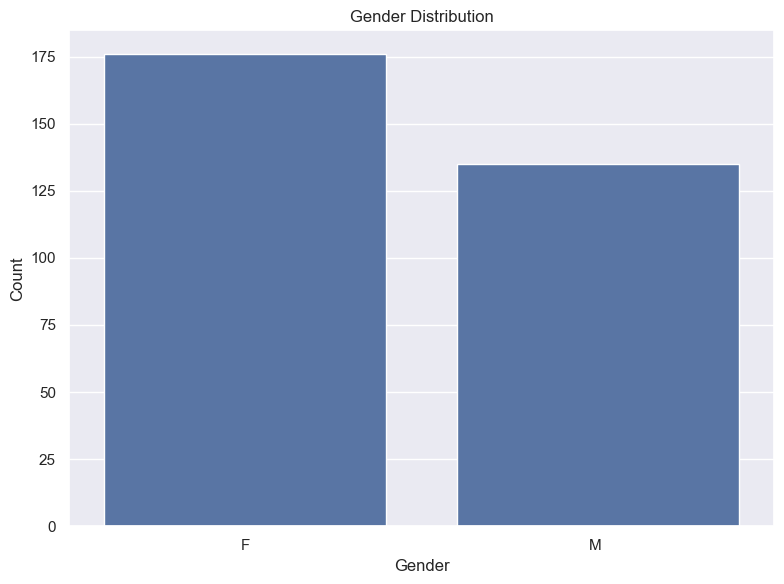

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(data=a,x='Sex',order=a['Sex'].value_counts().index)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

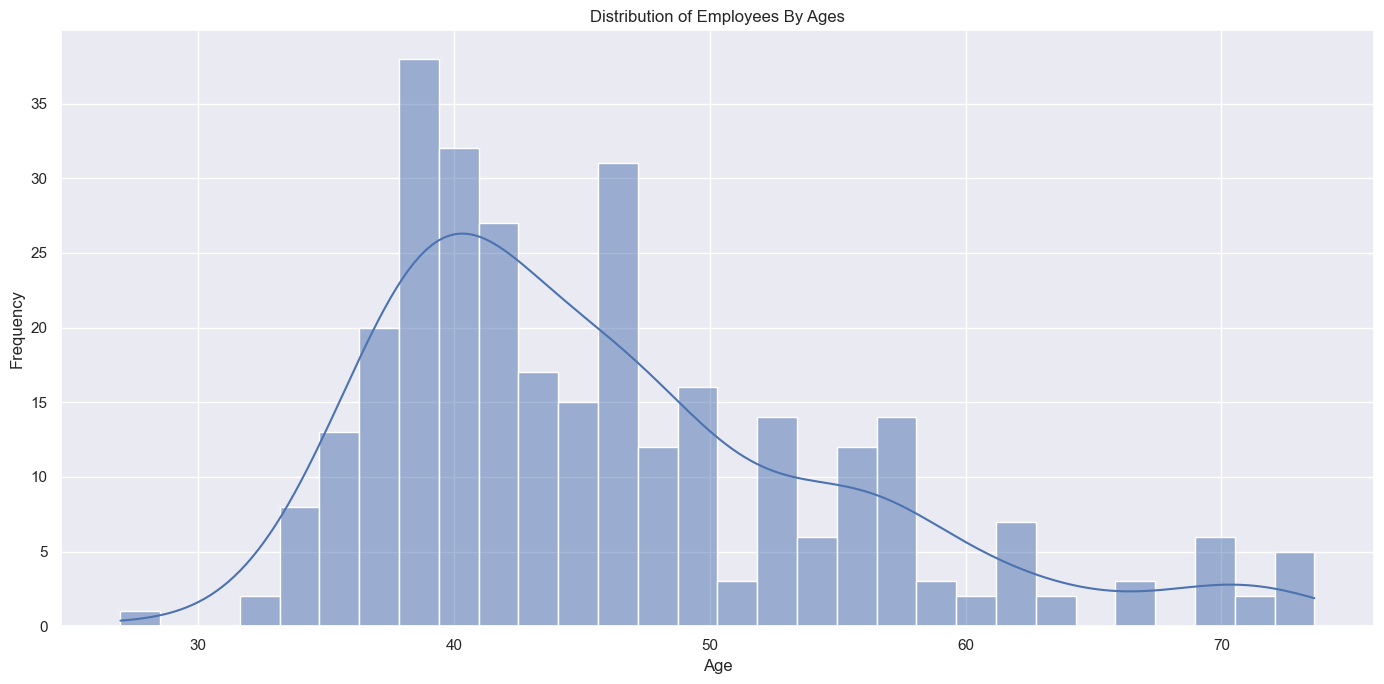

In [24]:
plt.figure(figsize=(14,7))
sns.histplot(a['Age'],bins=30,kde=True)
plt.title('Distribution of Employees By Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

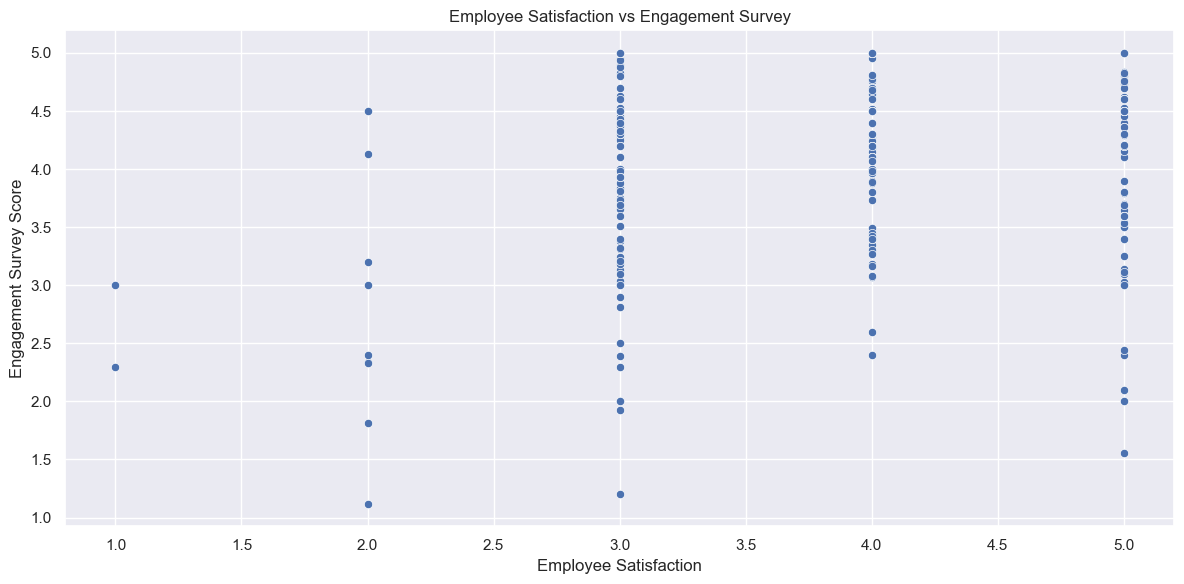

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=a,x='EmpSatisfaction',y='EngagementSurvey')
plt.title('Employee Satisfaction vs Engagement Survey')
plt.xlabel('Employee Satisfaction')
plt.ylabel('Engagement Survey Score')
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9404\1812173782.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=a,x='Department',y='Absences',estimator=np.sum,ci=None)


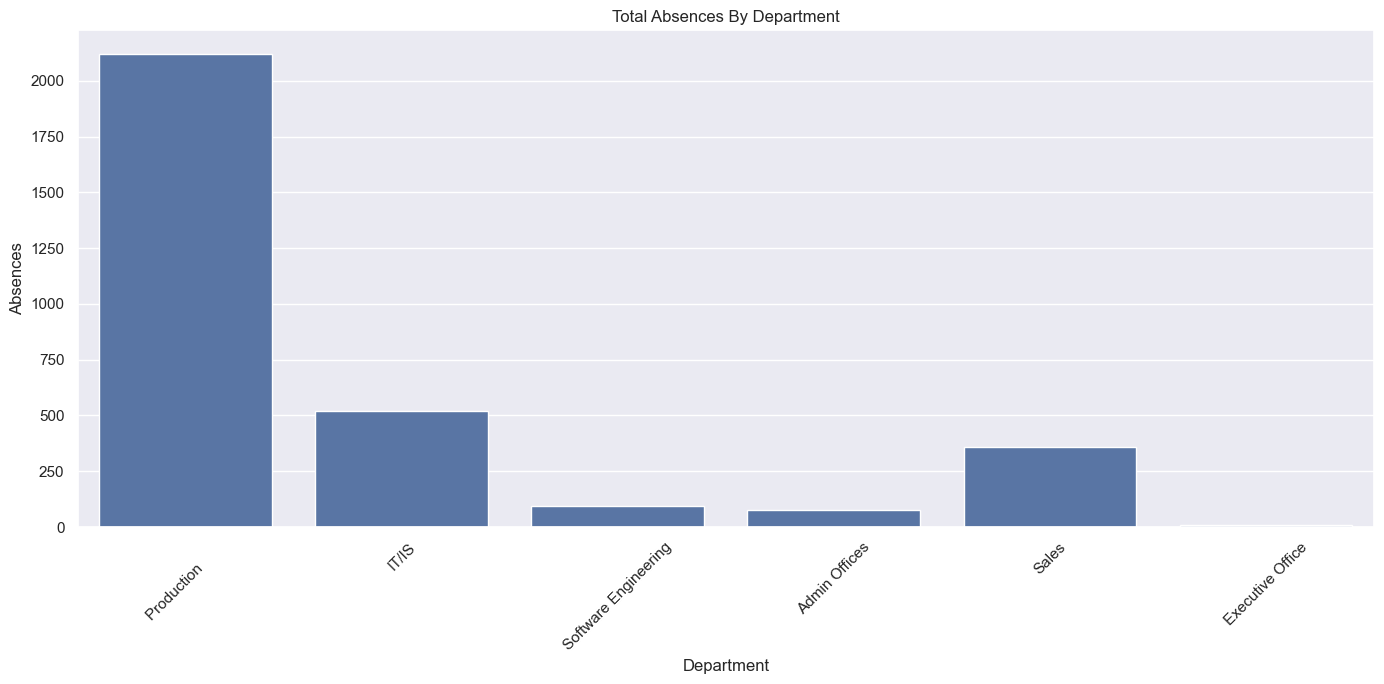

In [26]:
plt.figure(figsize=(14,7))
sns.barplot(data=a,x='Department',y='Absences',estimator=np.sum,ci=None)
plt.title('Total Absences By Department')
plt.xlabel('Department')
plt.ylabel('Absences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

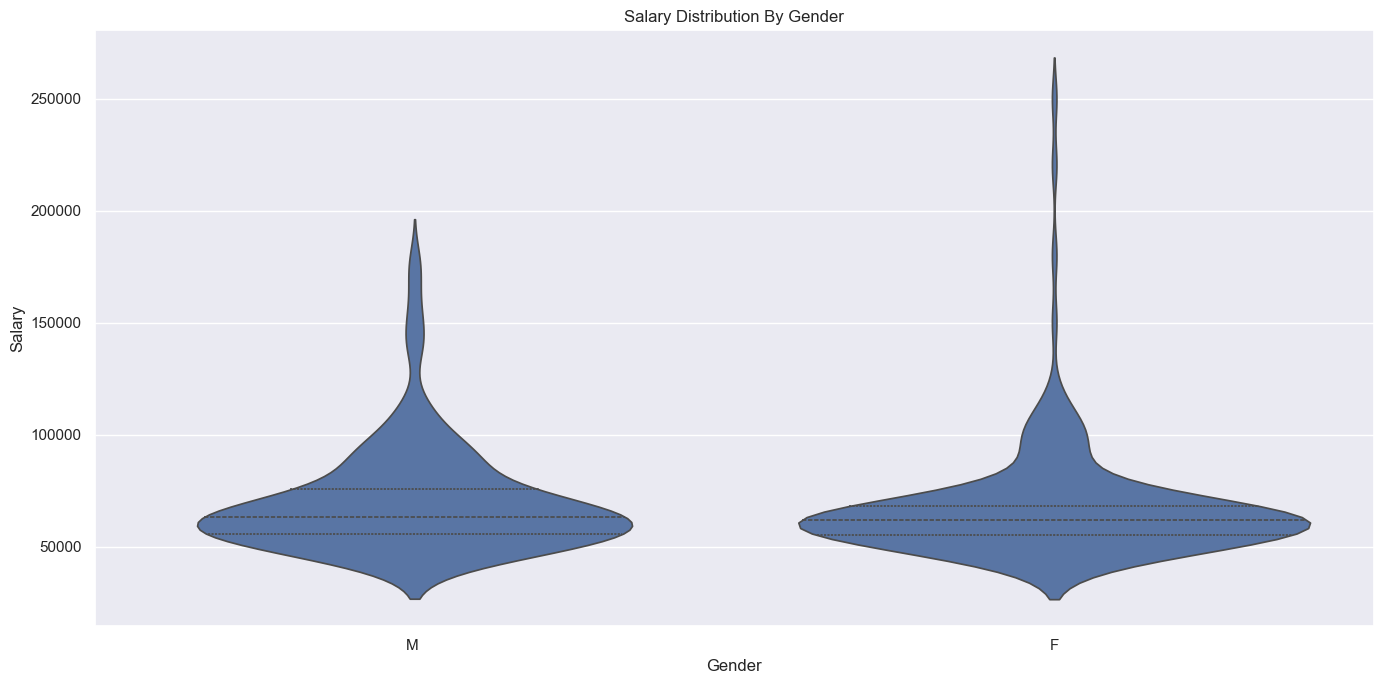

In [27]:
plt.figure(figsize=(14,7))
#The First Quartile (Q1) marks the 25th percentile, the Median (Q2) marks the 50th percentile, 
#and the Third Quartile (Q3) marks the 75th percentile.Quartile is area inside dotted lines in violin plot.
sns.violinplot(data=a,x='Sex',y='Salary',inner='quartile')
plt.title('Salary Distribution By Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

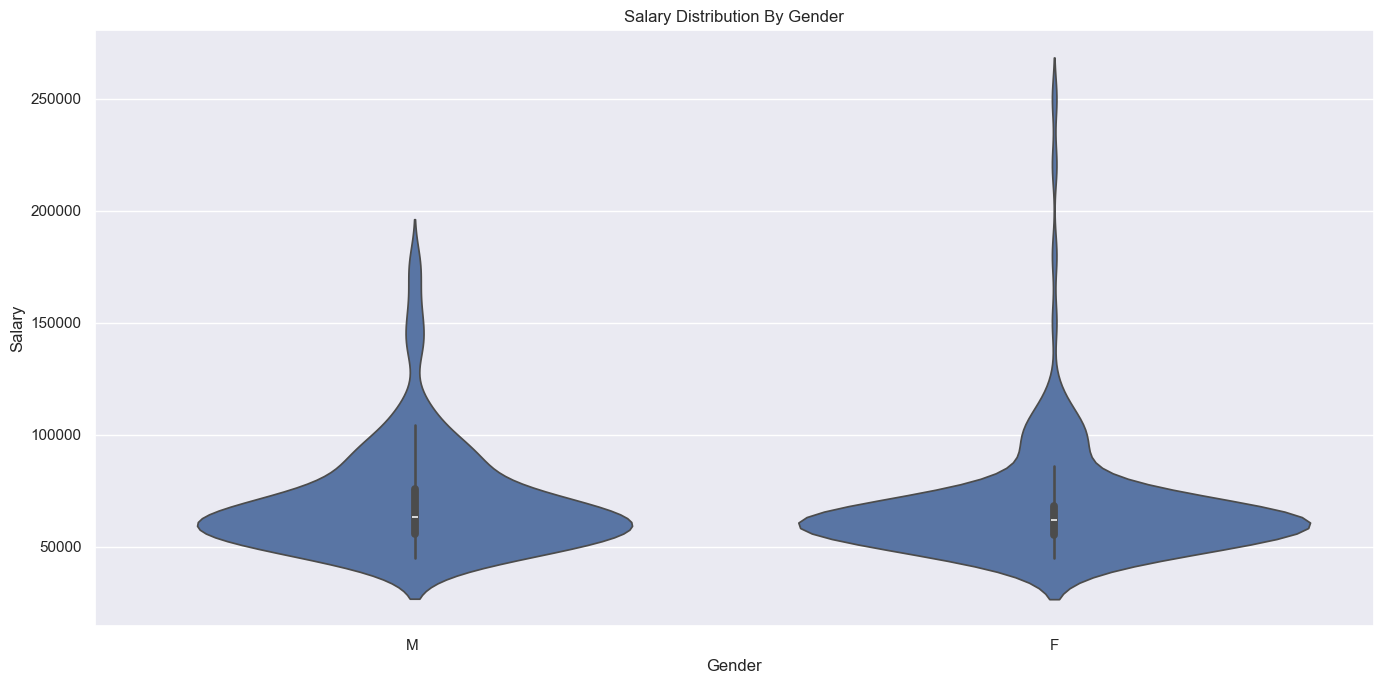

In [28]:
plt.figure(figsize=(14,7))
sns.violinplot(data=a,x='Sex',y='Salary',inner='box')
plt.title('Salary Distribution By Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

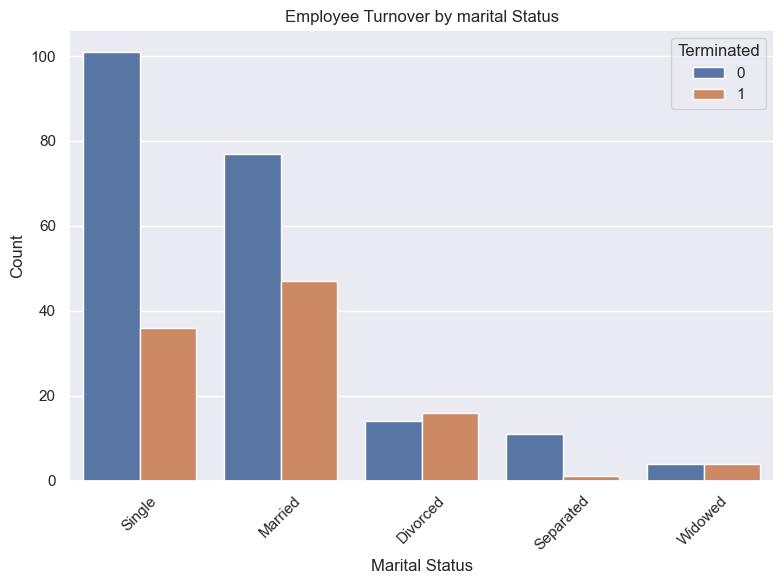

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(data=a,x='MaritalDesc',hue='Termd',order=a['MaritalDesc'].value_counts().index)
plt.title('Employee Turnover by marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Terminated')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9404\3880845847.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=a,x='PerformanceScore',y='Absences',estimator=np.mean,ci=None,


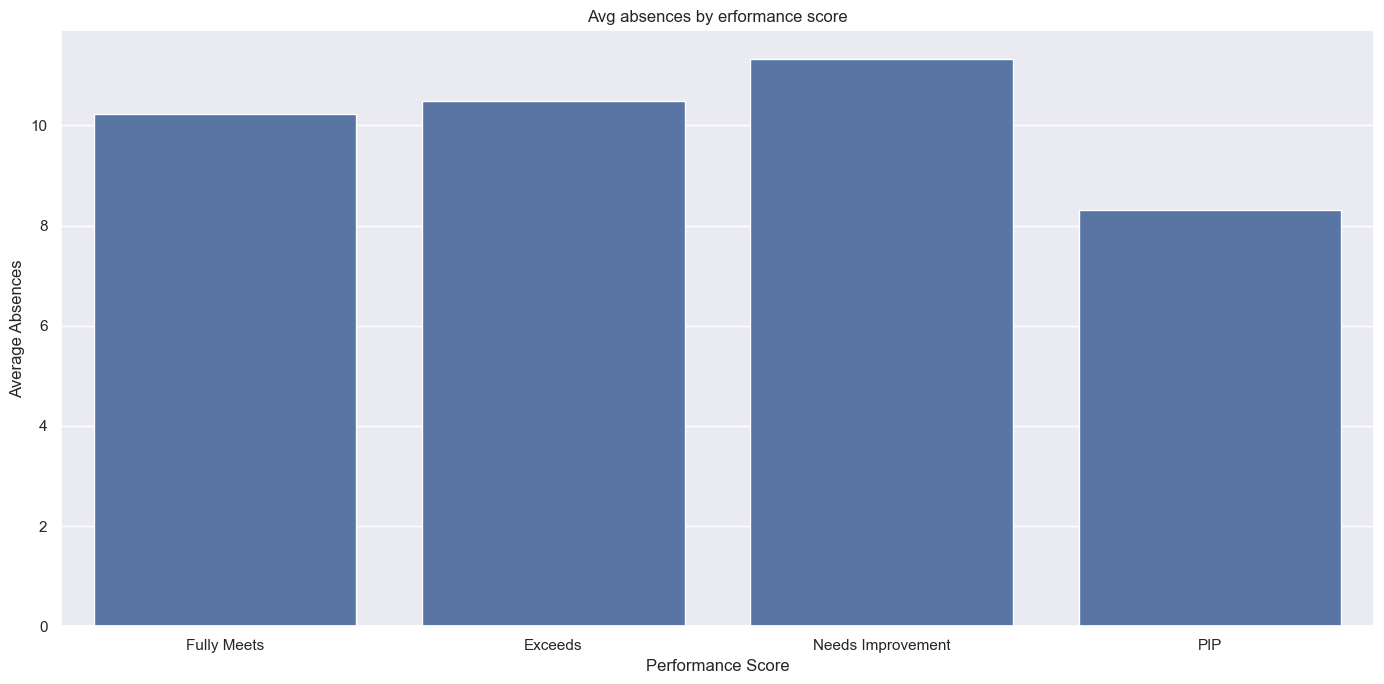

In [30]:
plt.figure(figsize=(14,7))
sns.barplot(data=a,x='PerformanceScore',y='Absences',estimator=np.mean,ci=None,
           order=a['PerformanceScore'].value_counts().index)
plt.title('Avg absences by erformance score')
plt.xlabel('Performance Score')
plt.ylabel('Average Absences')
plt.tight_layout()
plt.show()

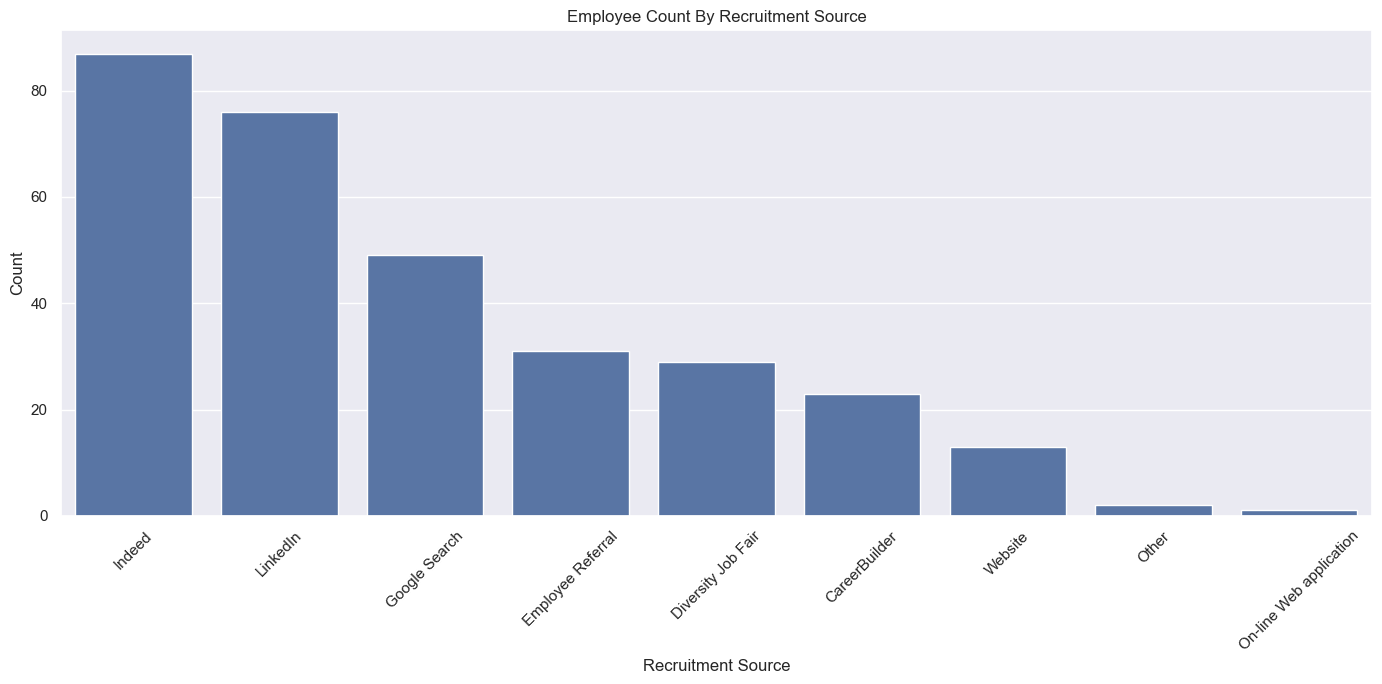

In [31]:
#Countplot:Employee count by recruitment source
plt.figure(figsize=(14,7))
sns.countplot(data=a,x='RecruitmentSource',order=a['RecruitmentSource'].value_counts().index)
plt.title('Employee Count By Recruitment Source')
plt.xlabel('Recruitment Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

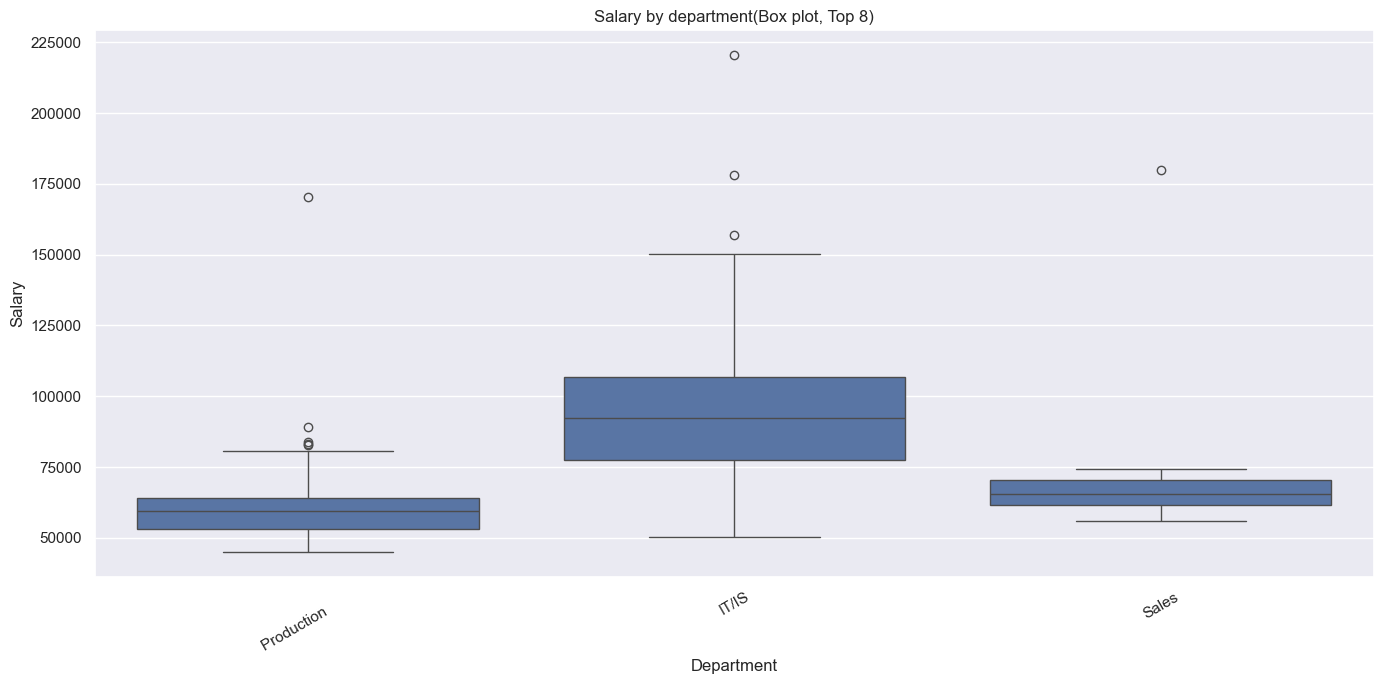

In [33]:
top3=a['Department'].value_counts().index[:3]
plt.figure(figsize=(14,7))
sns.boxplot(data=a[a['Department'].isin(top3)],x='Department',y='Salary')
plt.title('Salary by department(Box plot, Top 8)')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

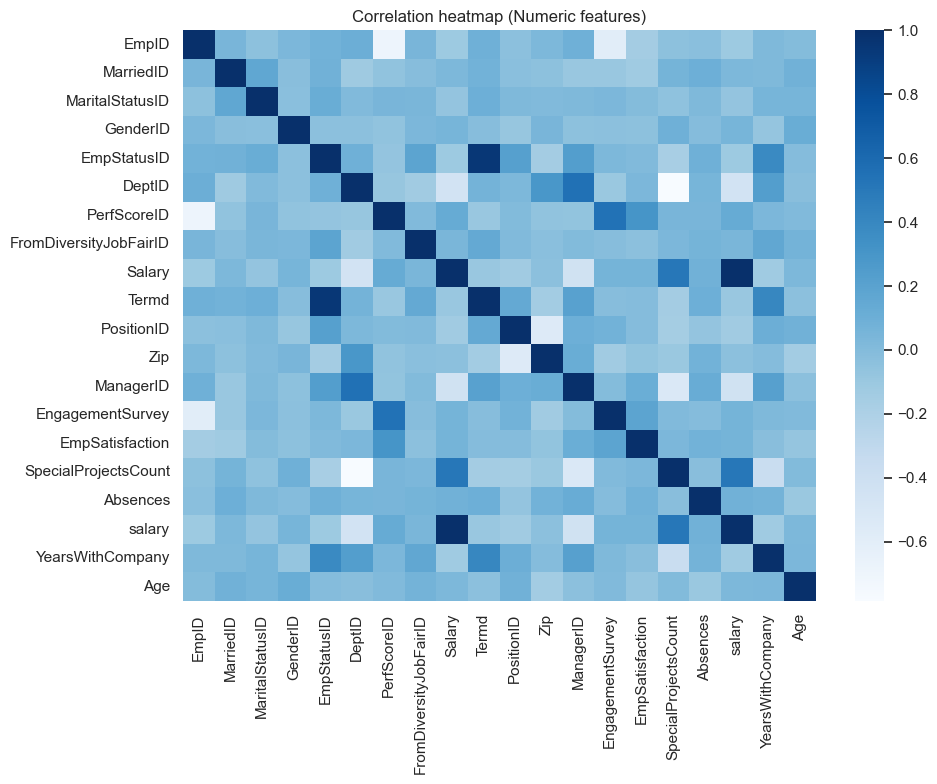

In [34]:
#Correlation Heatmap:numeric columns
plt.figure(figsize=(10,8))
corr=a.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr,annot=False,cmap='Blues')
plt.title('Correlation heatmap (Numeric features)')
plt.tight_layout()
plt.show()

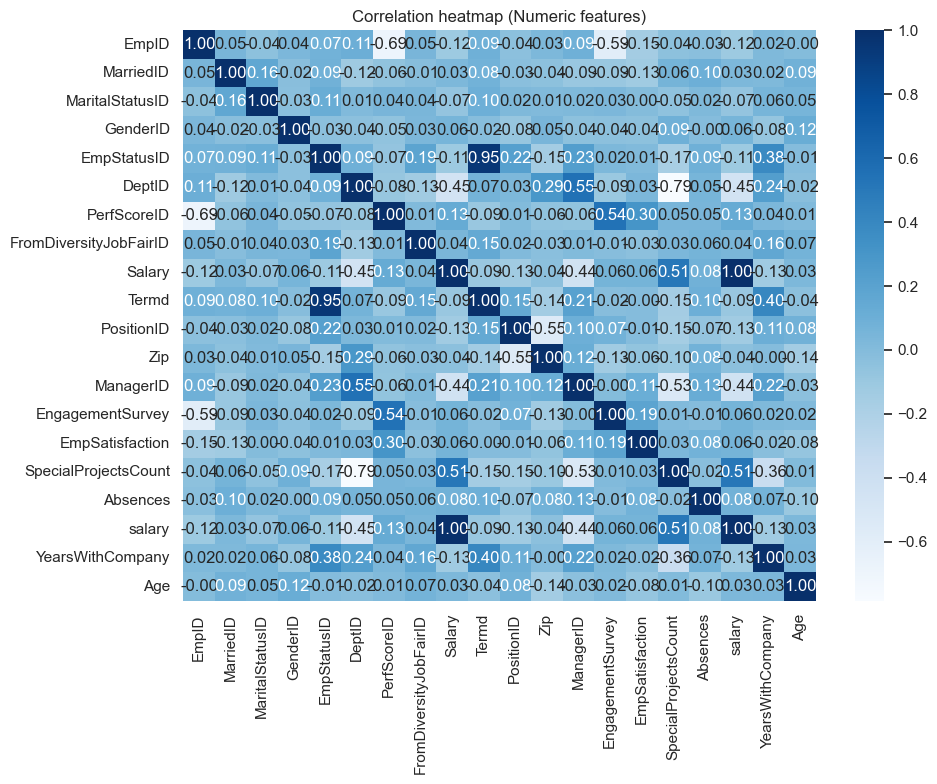

In [35]:
#Correlation Heatmap:numeric columns
plt.figure(figsize=(10,8))
corr=a.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr,annot=True,fmt='.2f',cmap='Blues')
plt.title('Correlation heatmap (Numeric features)')
plt.tight_layout()
plt.show()

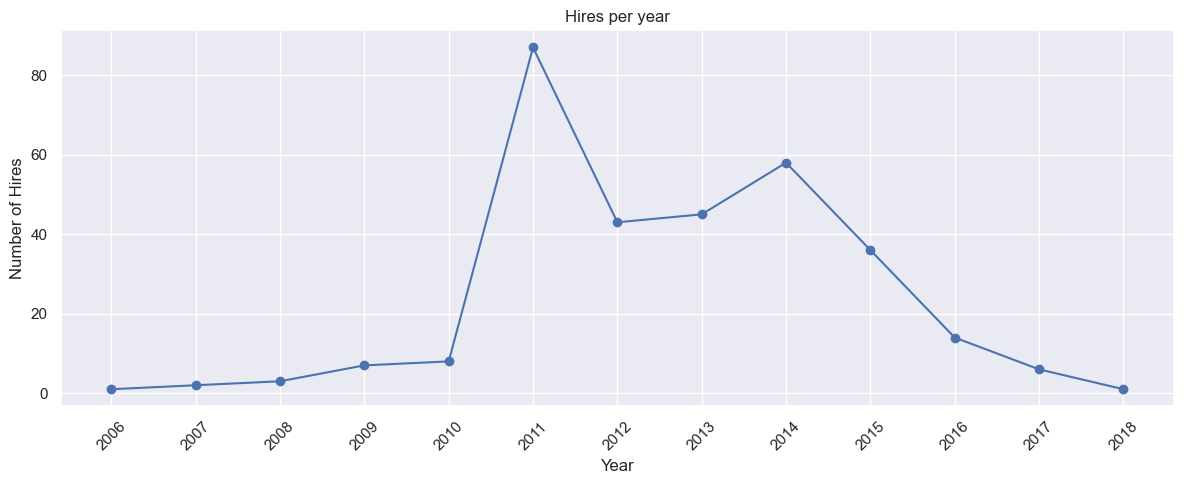

In [36]:
hires_per_year=a['DateofHire'].dt.to_period('Y').value_counts().sort_index()
plt.figure(figsize=(12,5))
plt.plot(hires_per_year.index.astype(str),hires_per_year.values,marker='o')
plt.title('Hires per year')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
#EDA Report
print("\n" + "="*70) #'=' is printed 70 times
print('EDA Report')
print("="*70)
print(f'Rows:{a.shape[0]} | Columns:{a.shape[1]}')
print(f'Top Department By Headcount:{a['Department'].value_counts().idxmax()}')
print(f'Most common position:{a['Position'].value_counts().idxmax()}')
print(f"Attrition Rate:{attrition_rate:.2f}%")


EDA Report
Rows:311 | Columns:38
Top Department By Headcount:Production       
Most common position:Production Technician I
Attrition Rate:33.44%


In [40]:
print(f'Average Salary:Rs.{average_salary:,.2f}')
print(f"Average Age:{a['Age'].mean():.1f} | Min: {a['Age'].min():.1f} | Max:{a['Age'].max():.1f}")
print(f'Average Tenure:{a["YearsWithCompany"].mean():.2f} years')
print("="*70)

Average Salary:Rs.69,020.68
Average Age:46.2 | Min: 27.0 | Max:73.6
Average Tenure:12.53 years
